In [2]:
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt
import matplotlib
from scipy import fftpack as spfft # for computing spectra
import scipy.signal as spsig

import librosa
import resampy
from subprocess import call

%matplotlib inline

# Set plot fontsize
matplotlib.rcParams.update({'font.size': 18})

Direct sonification is simply the process of changing the time scale of a signal to transpose it to the audible range. The data should therefore have similarities with sound waves in air, that is:

 - oscillations around an average value (better if this value is 0), a.k.a "stationary" data. 
 - not a vast range of amplitudes in the thing of interest
 - enough cycles to produce sound at the new frequency. 

We take the example of seismic data... but they could be many other things, e.g.:

[planetary:] 

 - ocean waves, tidal data
 - electro-magnetic waves (solar winds?)
 - gravitational waves
 - planetary orbital positions
 
[biological:] 

 - waves created by in blood circulation
 - ekg waves?
 
[sociological:] 
 - ? 

# EXAMPLE 1: a large earthquake 


## 1. Get the data (and in to python):

In [3]:
DirIn = '../0_data_nogit/'
DirOut = '../3_output_nogit/'

# (get the data first from the google drive for class-- and put it in the DirIn )
# This is the Tohoku earthquake (2011), recorded by a seimic station located in Central USA
FileNameIn = 'P39A.BHZ' # Note that this data has been pre-processed (instrument response removal)
fs = 20 # Datatype BHZ is sampled at 20 Hz
# In this case, you need to get the info from the data source. ) 

data = np.loadtxt(DirIn + FileNameIn)
duration = len(data)/fs
print('We have ' + str(int(duration)) + ' seconds of data!')
print('... which is ' + str(int(duration/3600)) + ' hours of data!')

# make time vectors for plotting purposes only
t = np.arange(0,duration,1./fs) # in seconds
t_hours = np.arange(0,duration/3600,1./fs/3600) # in hours

We have 50400 seconds of data!
... which is 14 hours of data!


In [4]:
# Compute the spectrum
Nfft = len(data)
f = np.arange(0,fs/2,fs/Nfft)
S = spfft.fft(data,Nfft); S = S[:int(Nfft/2)]
print('Frequency content ranges from ' + str(f[0]) + ' to ' + str(round(f[-1],3)) + ' Hz...')
print('Frequency content ranges from ' + str(np.log10(f[1])) + ' to ' + str(np.log10(f[-1])) + ' [log10(Hz)]')

Frequency content ranges from 0.0 to 10.0 Hz...
Frequency content ranges from -4.70243053645 to 0.999999138304 [log10(Hz)]


/Users/ben/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log10


(-4.9875520201829886,
 1.2851206220412079,
 -201.96264812121126,
 33.600228586148312)

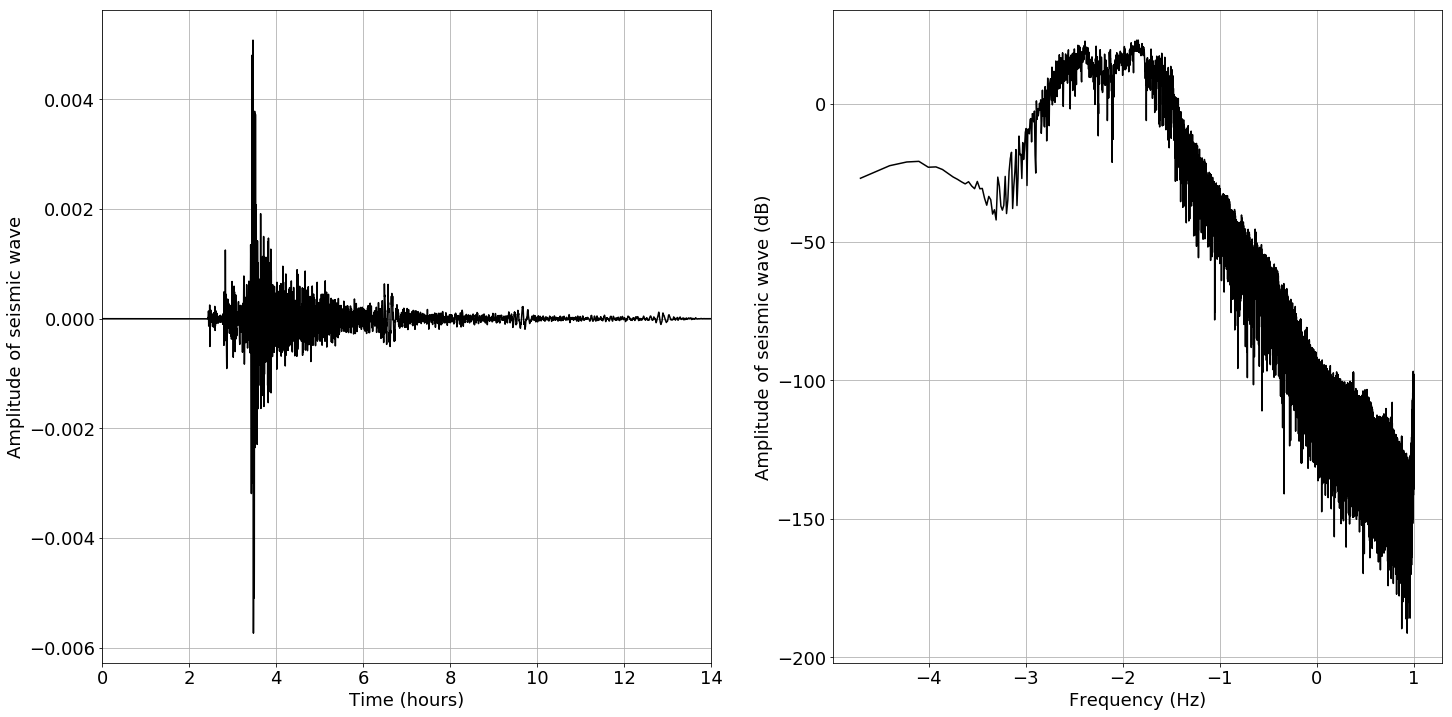

In [5]:
###### some useful prerequisites...

# 1) force the signal's mean value to be zero (how to kill your loudspeakers...)
data = data - np.mean(data)

# 2) limit the signal's amplitude = avoid too large peaks (how to re-kill your loudspeakers...)
# a simple way is to normalize the data according to its maximum amplitude value
# data = data/np.amax(data) # This is dangerous, peak values can be negative, too
data_n = data/np.amax(np.absolute(data))

# waveform
plt.figure(figsize=(12*2,6*2))
plt.subplot(1,2,1)
plt.plot(t_hours,data,'k') 
plt.xlabel('Time (hours)')
plt.ylabel('Amplitude of seismic wave')
plt.grid()
plt.xlim([0,duration/3600])

# spectrum: 
plt.subplot(1,2,2)
#plt.plot(f,20*np.log10(np.absolute(S)),'k') 
plt.plot(np.log10(f),20*np.log10(np.absolute(S)),'k') 
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude of seismic wave (dB)')
plt.grid()
plt.axis()

In [6]:


# # Let's compute the spectrogram
# NfftSTFT = 4096 # The number of frequency points for the FFT of each frame
# SliceLength = int(0.05*fs) # The length of each frame (should be expressed in samples)
# Overlap = int(SliceLength/4) # The overlapping between successive frames (should be expressed in samples)
# [fSTFT, tSTFT, STFT] = spsig.spectrogram(data_n, fs, nperseg=SliceLength, noverlap=Overlap, nfft=NfftSTFT) 
# # also provides associated f and t vectors!

# # Let's plot the spectrogram
# plt.figure(figsize=(10,6))
# plt.pcolormesh(tSTFT,fSTFT,20*np.log10(np.absolute(STFT)))
# plt.ylim([0,fs/8])
# #plt.xlim([0,dur1-SliceLength/sr])
# plt.xlabel('Time (s)')
# plt.ylabel('Frequency (Hz)')
# cbar = plt.colorbar()
# cbar.ax.set_ylabel('dB', rotation=270)

## NOW MAKE SOUND !

In [7]:
OutFileName = FileNameIn[:-4] + '_sonified.wav'

# For the free oscillations, we had a specific frequency that we wanted to shift to another one
# Here we can define a target duration instead

OriginalDuration = duration
TargetDuration = 12.0 # Try playing with this number! What happens to the sound if you make it smaller? Larger?
print('The data is ' + str(int(OriginalDuration)) + '-s long')
print('Let\'s make a ' + str(TargetDuration) + '-second long sound!')

SpeedFactor = OriginalDuration/TargetDuration
print('This corresponds to a speed factor of: ' + str(int(SpeedFactor)))

# (here we are speeding up the playback because the original content is infrasonic / 
# There are cases where we want to do the opposite, e.g. solar magnetic waves, acoustic emissions during rock microcracking...)
# compute the corresponding shift in frequency
# show the result with subplots original data VS. sonified data 
#      (time series / spectrum / spectrogram = no change except in the time scale)

The data is 50400-s long
Let's make a 12.0-second long sound!
This corresponds to a speed factor of: 4200


In [9]:
# # Original vs. Sonified Data
# plt.figure(figsize=(12*2,6*2))
# plt.subplot(1,2,1)
# plt.plot(t_hours,data_n,'k') 
# plt.xlabel('Time (hours)')
# plt.ylabel('Amplitude of seismic wave\n (normalized to max.)')
# plt.grid()
# plt.xlim([0,OriginalDuration/3600])
# plt.title('Old Seismogram (inaudible)')

# plt.subplot(1,2,2)
# plt.plot(t_hours*3600/SpeedFactor,data_n,'k') 
# plt.xlabel('Time (seconds)')
# plt.grid()
# plt.xlim([0,TargetDuration])
# plt.title('New Seismogram (audible)')

# # The difference is only in the time scale. We compress 14 hours into 12 seconds

In [11]:
# So, set the new sampling rate, and then resample to a standard sampling rate
fs_sound = int(fs*SpeedFactor)
#sr_resample = 44100

librosa.output.write_wav(DirOut + OutFileName, data_n, fs_sound, norm=False)

# Some software have troubles with exotic sampling rates (VLC and audacity don't have), so it might be necessary 
# to resample your sound.
#dataOrig, srOrig = librosa.core.load(DirOut + OutFileName, sr=sr_sound)
#data_rs = resampy.resample(dataOrig, srOrig, sr_resample)
#librosa.output.write_wav(DirOut + OutFileName, data_rs, sr_resample, norm=False)

# =========================================================
# Example 2: Much longer seismic signal: free oscillations 
### filtering to find a hidden signal ! 

In [15]:
# get the data in: 
DirIn = '../0_data_nogit/'

# This is the Sumatra earthquake (2004), recorded by a seimic station located in Albuquerque, NM
FileNameIn = 'Sumatra_2004_ANMO_14wks.VHZ' 
# Note that this data has been pre-processed (instrument response removal)
fs = 0.1 
# Datatype VHZ is downsampled to 0.1 Hz (p=10 s)

data = np.loadtxt(DirIn + FileNameIn)
duration = len(data)/fs

In [16]:
# make time vectors for plotting purposes only
t = np.arange(0,duration,1./fs) # in seconds
t_hours = np.arange(0,duration/3600,1./fs/3600) # in hours
t_days = np.arange(0,duration/3600/24,1./fs/3600/24) # in days

print('We have ' + str(int(duration)) + ' seconds of data!')
print('... which is ' + str(int(duration/3600)) + ' hours of data!')
print('... which is ' + str(int(duration/3600/24)) + ' days of data!')

We have 8467200 seconds of data!
... which is 2352 hours of data!
... which is 98 days of data!


In [17]:
# Compute the spectrum
Nfft = len(data)
f = np.arange(0,fs/2,fs/Nfft)
S = spfft.fft(data,Nfft); S = S[:int(Nfft/2)]
print('Frequency content ranges from ' + str(f[0]) + ' to ' + str(round(f[-1],3)) + ' Hz...')
print('Frequency content ranges from ' + str(np.log10(f[1])) + ' to ' + str(np.log10(f[-1])) + ' [log10(Hz)]')

Frequency content ranges from 0.0 to 0.05 Hz...
Frequency content ranges from -6.92773981817 to -1.30103102149 [log10(Hz)]


In [18]:
# 1) force the signal's mean value to be zero (how to kill your loudspeakers...)
data = data - np.mean(data)

# 2) limit the signal's amplitude = avoid too large peaks (how to re-kill your loudspeakers...)
# but keep the value because we want to compare the power to other data... 
maxabs = np.amax(np.absolute(data))
data_n = data/maxabs

/Users/ben/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]


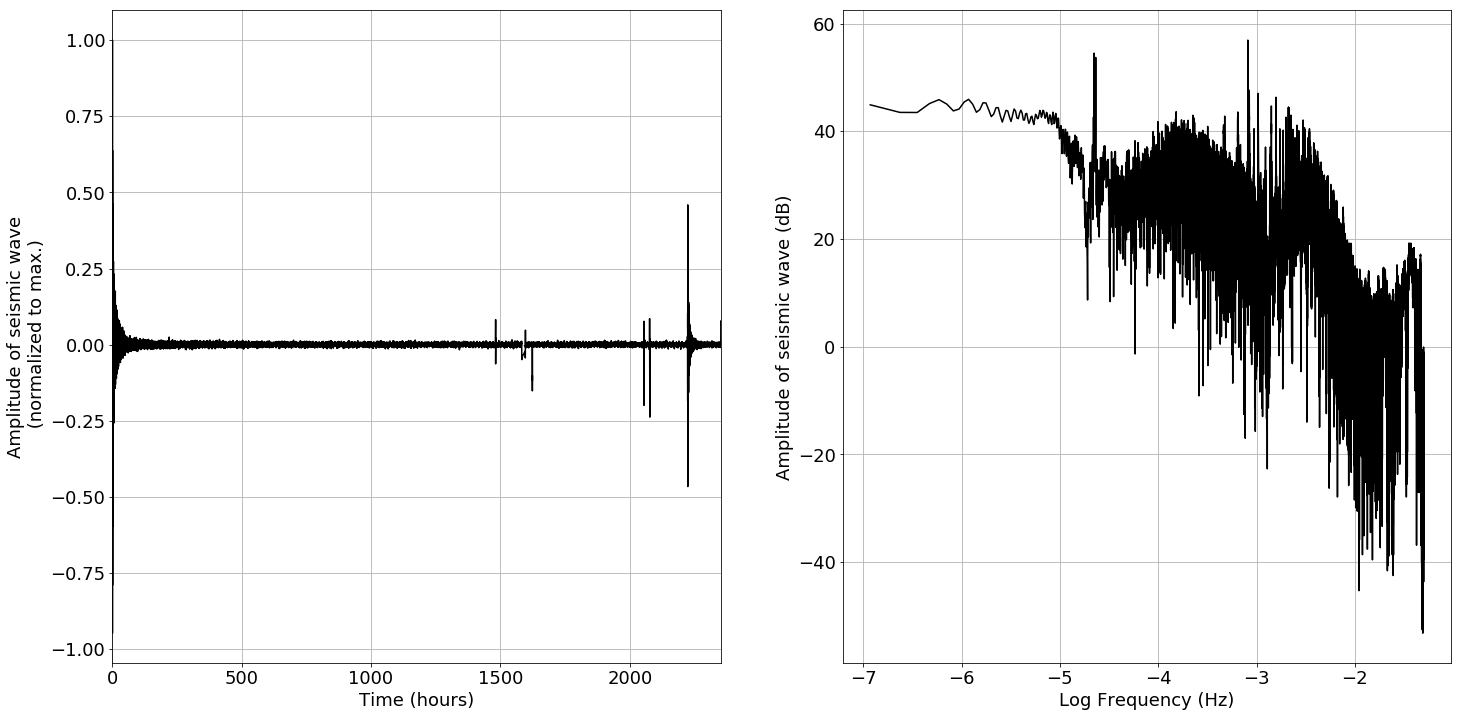

In [19]:
# plot
S = spfft.fft(data_n,Nfft)
S = S[:int(Nfft/2)]

plt.figure(figsize=(12*2,6*2))
plt.subplot(1,2,1)
plt.plot(t_hours,data_n,'k') 
plt.xlabel('Time (hours)')
plt.ylabel('Amplitude of seismic wave\n (normalized to max.)')
plt.grid()
plt.xlim([0,duration/3600])
plt.subplot(1,2,2)
plt.plot(np.log10(f),20*np.log10(np.absolute(S)),'k') 
plt.xlabel('Log Frequency (Hz)')
plt.ylabel('Amplitude of seismic wave (dB)')
plt.grid()

In [ ]:
#from scipy import signal as spsig

# Let's compute the spectrogram
NfftSTFT = 4096 # The number of frequency points for the FFT of each frame
print(fs)
SliceLength = int(20*fs) # The length of each frame (should be expressed in samples)
print(SliceLength)
Overlap = int(SliceLength/4) # The overlapping between successive frames (should be expressed in samples)
[fSTFT, tSTFT, STFT] = spsig.spectrogram(data_n, fs, nperseg=SliceLength, noverlap=Overlap, nfft=NfftSTFT) 
# also provides associated f and t vectors!

# Let's plot the spectrogram
plt.figure(figsize=(10,6))
plt.pcolormesh(tSTFT,fSTFT,20*np.log10(np.absolute(STFT)))
plt.ylim([0,fs/8])
#plt.xlim([0,dur1-SliceLength/sr])
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
cbar = plt.colorbar()
cbar.ax.set_ylabel('dB', rotation=270)

0.1
2


In [22]:
outfile_name = '14weeks_Sumatra_nofilt.wav'

OriginalDuration = duration
TargetDuration = 12.0 # Try playing with this number! What happens to the sound if you make it smaller? Larger?
print('The data is ' + str(int(OriginalDuration)) + '-s long')
print('Let\'s make a ' + str(TargetDuration) + '-second long sound!')

SpeedFactor = OriginalDuration/TargetDuration
print('This corresponds to a speed factor of: ' + str(int(SpeedFactor)))

# So, set the new sampling rate, and then resample to a standard sampling rate
sr_sound = int(sr*SpeedFactor)
librosa.output.write_wav(DirOut + outfile_name, data_n, sr_sound, norm=False)

# Some software have troubles with exotic sampling rates (VLC and audacity don't have), so it might be necessary 
# to resample your sound. if so, uncomment: 

# sr_resample = 44100
# dataOrig, srOrig = librosa.core.load(DirOut + OutFileName, sr=sr_sound)
# data_rs = resampy.resample(dataOrig, srOrig, sr_resample)
# librosa.output.write_wav(DirOut + OutFileName, data_rs, sr_resample, norm=False)

The data is 8467200-s long
Let's make a 12.0-second long sound!
This corresponds to a speed factor of: 705600


In [ ]:
# go back and trim it ! to hear the surface waves throbbing ! 

In [23]:
# then try FILTERING IT ! 

#### Their period typically ranges from 20 minutes to a few hours, i.e. a frequency between, say, approximately 0.0002 and 0.002 Hz

### https://vimeo.com/215665951
### http://lucien.saviot.free.fr/terre/index.en.html 

(0.0002, 0.002)

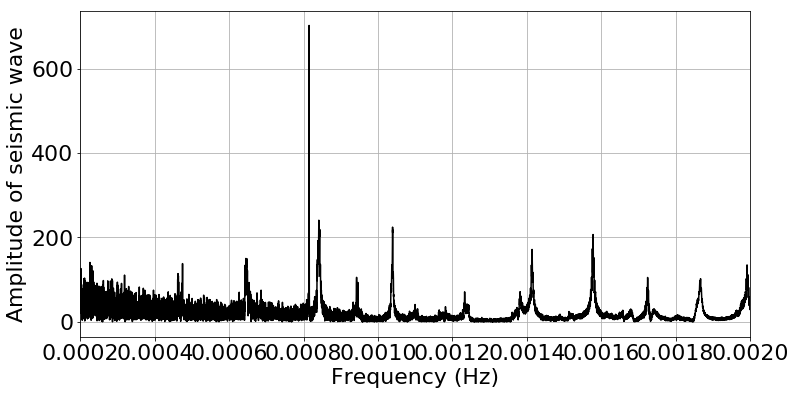

In [41]:
plt.figure(figsize=(12,6))
plt.plot(f,np.absolute(S),'k') 
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude of seismic wave')
plt.grid()
plt.xlim([0.0002, 0.002])

In [ ]:
Q = 5 # Quality factor: how wide the filter is around fcenter(higher value damps LESS quickly)
FiltOrder = 2; # Filter Order: (how steep the sides are)

#fcenter = 0.000833333
fcenter = 0.00104
#fcenter = 0.00141

BW_SemiWidth = fcenter/(2*Q)
fmin = fcenter-BW_SemiWidth; 
fmax = fcenter+BW_SemiWidth; 
cutofffreq = np.array([fmin, fmax]) / (sr/2);     

b, a = spsig.butter(FiltOrder, cutofffreq, btype='band', analog=False, output='ba')
w, h = spsig.freqz(b, a); 
w = w*sr/np.pi/2

data_filt = spsig.lfilter(b, a, data)
S_filt = spfft.fft(data_filt,Nfft) # compute the spectrum
S_filt = S_filt[:int(Nfft/2)] # up to the Nyquist frequency

print("Center frequency is: " + "%.02E" %(fcenter) + " Hz")
print("Cut-off frequencies are: " + "%.02E" %(fmin) + " Hz & " + "%.02E" %(fmax) + " Hz")

In [ ]:
##### Plot and compare original and filtered signals
fig = plt.figure(figsize=(20,16))
plt.subplot(2,2,1)
plt.plot(t_days,data,'k') 
plt.title("Original signal"); plt.xlabel("Time (days)")
plt.ylim([-0.0015, 0.0015])
plt.grid()
plt.xlim([0, duration/3600/24])

plt.subplot(2,2,2)
plt.plot(t_days,data_filt,'k')
plt.title("Filtered signal"); plt.xlabel("Time (days)")
plt.grid()
plt.xlim([0, duration/3600/24])

plt.subplot(2,3,4)
plt.plot(f,20*np.log10(np.abs(S)),'k',label='Spectrum')
plt.plot(w, 20*np.log10(abs(h))+  + 20*np.log10(np.amax(np.abs(S))),'--g',label='Filt. resp.',linewidth=2)
plt.title("Original spectrum"); plt.xlabel("Freq (Hz)")
plt.ylim([-150., 10.])
plt.grid()
plt.legend(bbox_to_anchor=(0.2, 0.9), loc=3,ncol=2)

plt.subplot(2,3,5)
plt.plot(f,20*np.log10(np.abs(S_filt)),'k',label='Spectrum')
plt.plot(w, 20 * np.log10(abs(h)) + 20*np.log10(np.amax(np.abs(S_filt))),'--g',label='Filt. resp.',linewidth=2)
plt.title("Filtered spectrum"); plt.xlabel("Freq (Hz)")
plt.ylim([-150., 10.])
plt.grid()
plt.legend(bbox_to_anchor=(0.2, 0.9), loc=3,ncol=2)

plt.subplot(2,3,6)
plt.plot(f,20*np.log10(np.abs(S_filt)),'k',label='Spectrum')
plt.plot(w, 20*np.log10(abs(h)) + 20*np.log10(np.amax(np.abs(S_filt))),'--g',label='Filt. resp.',linewidth=2)
plt.xlim([fcenter-8*BW_SemiWidth, fcenter+8*BW_SemiWidth])
plt.title("Filtered spectrum (magnified view)"); plt.xlabel("Freq (Hz)")
plt.ylim([-110., 10.])
plt.grid()
plt.legend(bbox_to_anchor=(0.2, 0.05), loc=3,ncol=2)

# want to save this awesome figure?
fig.savefig(DirOut + 'SumatraFiltered.png')

# =========================================================
# Example 3: LIGO data   
## Laser Interferometer Gravitational-Wave Observatory  (DOI: 10.1103/PhysRevLett.116.061102)
## https://www.ligo.org/
### Much, much much lower amplitude than seismic waves: compare the spectra !
### (too short for direct sonification !)  

In [ ]:
# get the data in: 
DirIn = '../0_data_examples/LIGO/'

# This is the Sumatra earthquake (2004), recorded by a seimic station located in Albuquerque, NM
FileNameIn = 'obs_HanfordWA.txt' 
# https://www.gw-openscience.org/GWTC-1-confident/
# Note that this data has been pre-processed (instrument response removal)
fs = 4096 # Hz (looks like this is not correct ! )
# Datatype VHZ is downsampled to 0.1 Hz (p=10 s)

data = np.loadtxt(DirIn + FileNameIn)
print(data.shape)
print(data[0,0])
# note that np.loadtext automatically skipped the column headers ! 

time = np.squeeze(data[0:-1,0])
strain = np.squeeze(data[0:-1,1])
print(time.shape)

print(time[-1])
#plt.plot(time-time[0])

duration0 = (time[-1]-time[0])
dt = duration0/len(time) # since we don't a priori know if time is regularly spaced (probably is)
print(duration0)

fs = 1/dt 
print(fs)

#duration = len(data)/fs
#print(duration)

In [ ]:
# play it directly ! 
data = strain 


In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(time,data,'k') 
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude of strain')
plt.grid()
#plt.xlim([0,duration/3600])
plt.subplot(1,2,2)
plt.plot(f,20*np.log10(np.absolute(S)),'k') 
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude of strain (dB)')
plt.grid()

In [ ]:
# Compute the spectrum
Nfft = len(data)
#f = np.arange(0,sr/2,sr/Nfft)
f = np.linspace(0,sr/Nfft,round(Nfft/2))
S = spfft.fft(data,Nfft) 
S = S[:int(Nfft/2)]
print(len(f))
print(len(S))
print('Frequency content ranges from ' + str(f[0]) + ' to ' + str(round(f[-1],3)) + ' Hz...')
print('Frequency content ranges from [log10] ' + str(np.log10(f[1])) + ' to ' + str(np.log10(f[-1])) + ' Hz...')

In [ ]:
# from scipy import signal as spsig

# # Let's compute the spectrogram
# NfftSTFT = 4096 # The number of frequency points for the FFT of each frame
# SliceLength = int(0.05*fs) # The length of each frame (should be expressed in samples)
# Overlap = int(SliceLength/4) # The overlapping between successive frames (should be expressed in samples)
# [fSTFT, tSTFT, STFT] = spsig.spectrogram(data_n, fs, nperseg=SliceLength, noverlap=Overlap, nfft=NfftSTFT) 
# # also provides associated f and t vectors!

# # Let's plot the spectrogram
# plt.figure(figsize=(10,6))
# plt.pcolormesh(tSTFT,fSTFT,20*np.log10(np.absolute(STFT)))
# plt.ylim([0,fs/8])
# #plt.xlim([0,dur1-SliceLength/sr])
# plt.xlabel('Time (s)')
# plt.ylabel('Frequency (Hz)')
# cbar = plt.colorbar()
# cbar.ax.set_ylabel('dB', rotation=270)